# Extracting colors from images

https://www.alessandroai.com/extract-and-analyze-colors-from-any-image/

In [2]:
from collections import Counter, OrderedDict
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def preprocess(raw):
    image = cv2.resize(raw, (900, 600), interpolation = cv2.INTER_AREA)                                          
    image = image.reshape(image.shape[0]*image.shape[1], 3)
    return image

    
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        hex_color += ("{:02x}".format(int(i)))
    return hex_color

In [4]:
def analyze(img):
    clf = KMeans(n_clusters = 10, random_state = 0)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    print("Found the following colors:\n")
    for color in hex_colors:
      print(color)

In [5]:
image = cv2.imread('test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Found the following colors:

#7b3421
#826d38
#1a140b
#384f2c
#466436
#352c1b
#47546a
#c1a44f
#544525
#55261a


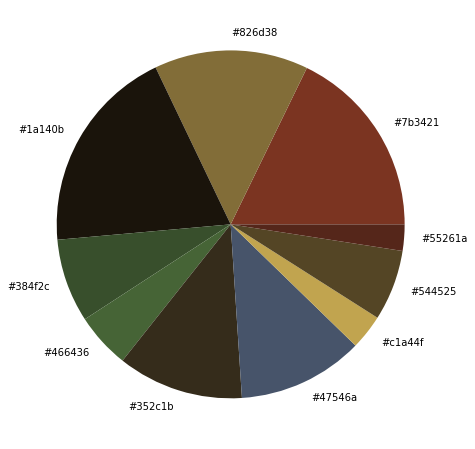

In [6]:
modified_image = preprocess(image)
d = analyze(modified_image)

In [9]:
def analyze2(img):
    clf = KMeans(n_clusters = 10, random_state = 0)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_ # in RGB

    counts =  Counter(color_labels)
    ordered_colors = [rgb_to_hex(center_colors[i]) for i in counts.keys()]

    d = {}
    for i in range(len(ordered_colors)):
        d[ordered_colors[i]] = list(counts.values())[i]
    d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}

    plt.figure(figsize = (12, 8))
    plt.pie(d.values(), labels = d.keys(), colors = d.keys())

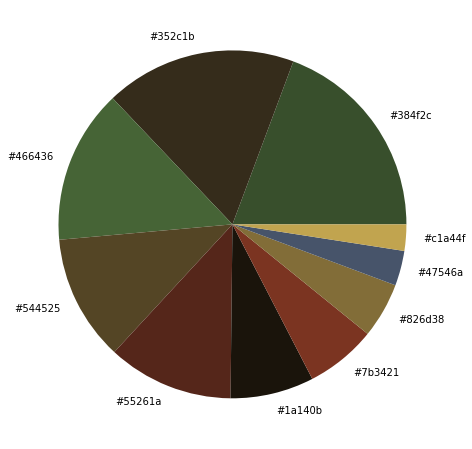

In [10]:
modified_image = preprocess(image)
analyze2(modified_image)